# **1. Importing Data & Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv('/content/walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **2. Checking the Dataset**

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insight:**


*   There are no null values in tthe dataset.




## **2.1 Changing Data type for all columns except Purchase to Category**

In [ ]:
for col in df.columns[:-1]:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.duplicated().sum()

0

## **2.2 Sanity Check for all Columns**

In [ ]:
for col in df.columns:
  print("Unique Values in: ", col)
  print(df[col].unique())
  print("-" * 75)

Unique Values in:  User_ID
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
---------------------------------------------------------------------------
Unique Values in:  Product_ID
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
---------------------------------------------------------------------------
Unique Values in:  Gender
['F', 'M']
Categories (2, object): ['F', 'M']
---------------------------------------------------------------------------
Unique Values in:  Age
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18

## **2.3 Statistical Summary**

In [ ]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Insights:**


*   **User_ID:** There are 5,891 unique users amoung 5,50,068	transactions, indicating purchase of multiiple products.

*   **Product_ID:** There are 3.631 unique products and Product_ID P00265242 is sold the most.

* **Gender:** Out of 5,50,068 transactions, 4,14,259 were done by Male.

* **Age:** Among 7 age groups, most of the customers are between ages 26 - 35 which can be classified as Young Adults.

* **Stay_In_Current_City_Years:** Customers with 1 year of stay in current city accounted to maximum transactions compared to customers with (0,2,3,4+) years of stay in current city.

* **Marital_Status:** 3,24,731 of the total transactions were done by Unmarried Customers i.e 59%.



In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Insight:**

* The purchase amount is varies from minimum purchase of 12 dollars to maximum of $23,961.
The median purchase amount is 8,047 dollars which is lower than mean of 9,264 dollar indicating a right-skewed distribution.


# **3. Outlier Detection**

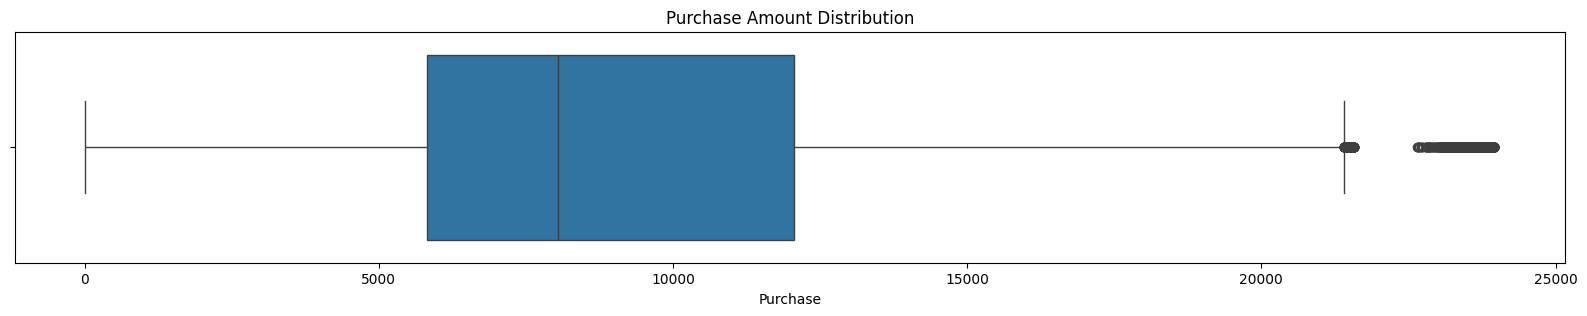

In [ ]:
# Checking outlier using boxplot for continous varibles in df

plt.figure(figsize=(20, 3))
sns.boxplot(data=df['Purchase'], orient = "h" )
plt.title('Purchase Amount Distribution')
plt.show()

## **3.1 Number & Percentage of Outliers**

In [ ]:
x1 = np.percentile(df['Purchase'], 25)
x2 = np.percentile(df['Purchase'], 75)

IQR = x2 - x1

A = x2 + (1.5*IQR)
No_of_outliers = len(df[df['Purchase'] > A])
Precentage_of_outlier = ( No_of_outliers / len(df)) * 100

print("Number of Outlier are", No_of_outliers)
print("Percentage of Outlier is", round(Precentage_of_outlier, 2))

Number of Outlier are 2677
Percentage of Outlier is 0.49


## **3.2 Clipping data between 5 and 95 percentile**

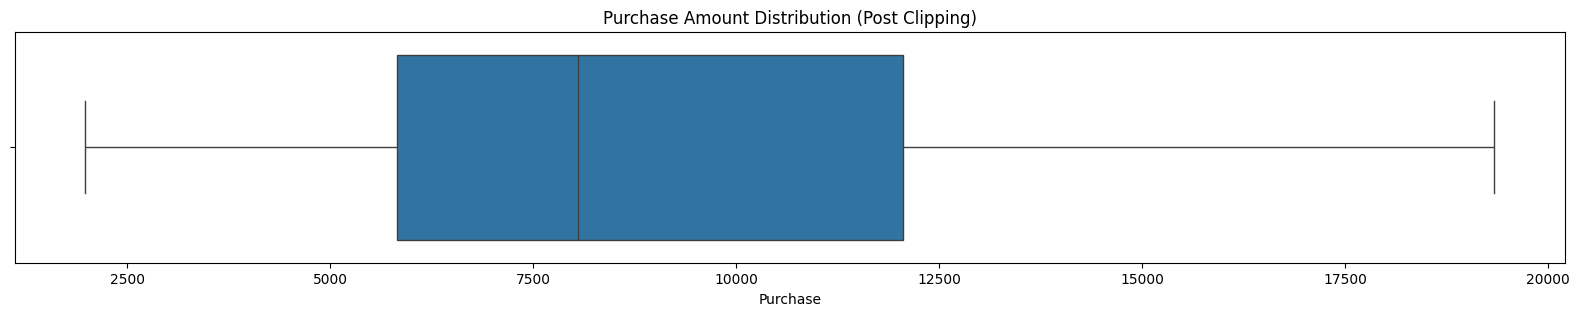

In [ ]:
lower_percentile = np.percentile(df['Purchase'], 5)
upper_percentile = np.percentile(df['Purchase'], 95)

df['Purchase'] = np.clip(df['Purchase'], lower_percentile, upper_percentile)

plt.figure(figsize=(20, 3))
sns.boxplot(data=df['Purchase'], orient = "h" )
plt.title('Purchase Amount Distribution (Post Clipping)')
plt.show()

# **3.3 Multi-variate Analysis**

## **3.3.1 Top 10 Products for each Age Group**

In [ ]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

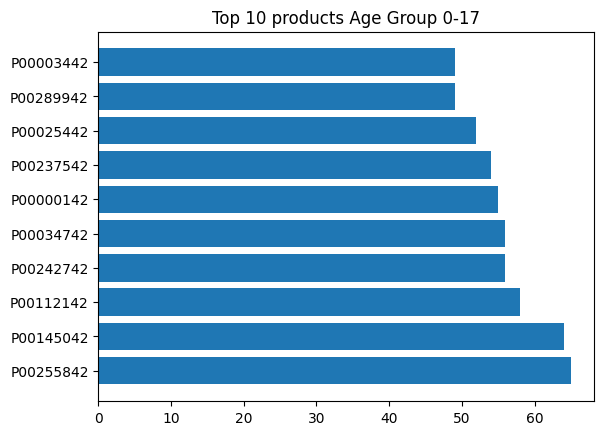

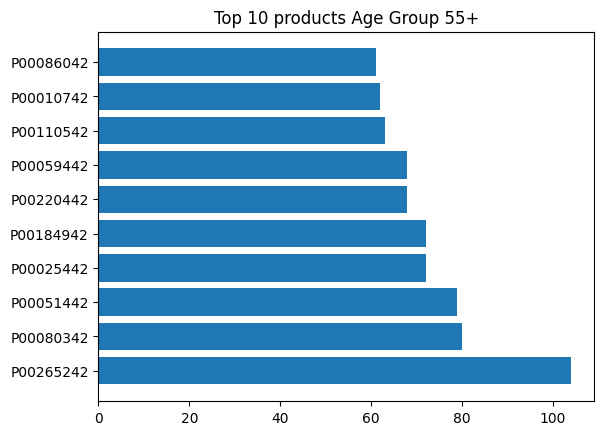

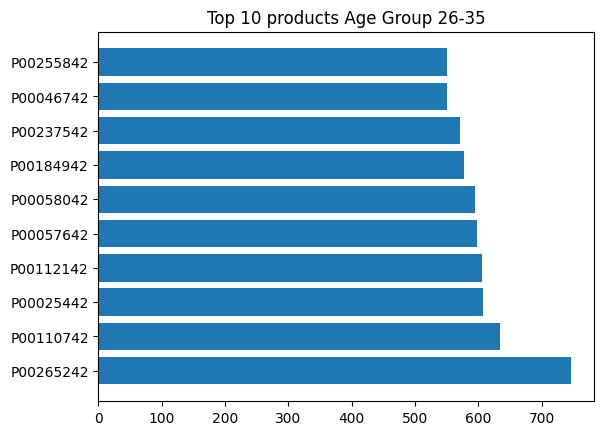

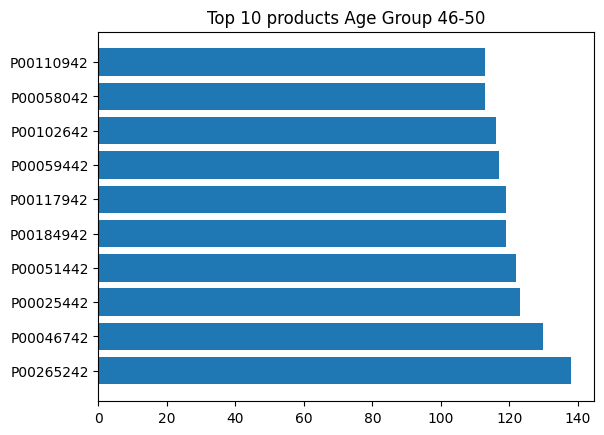

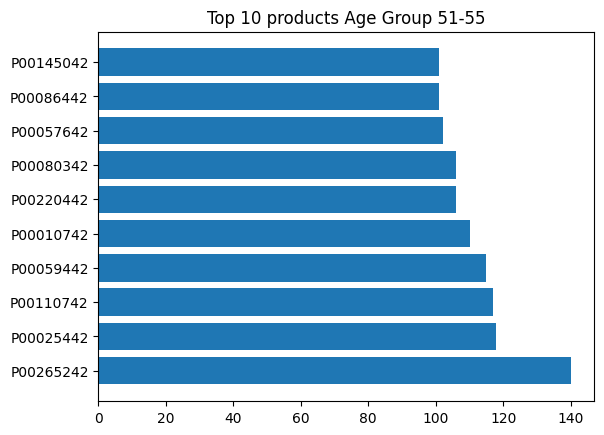

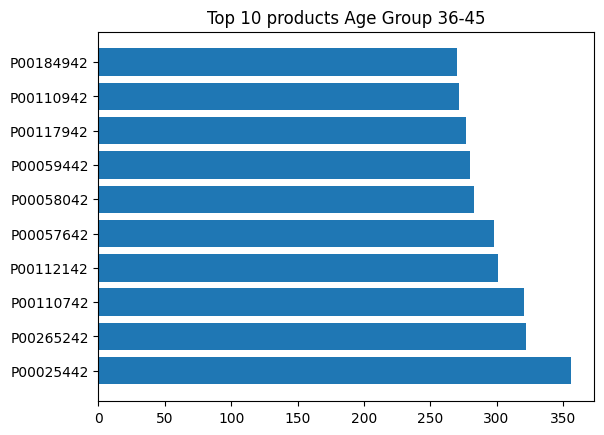

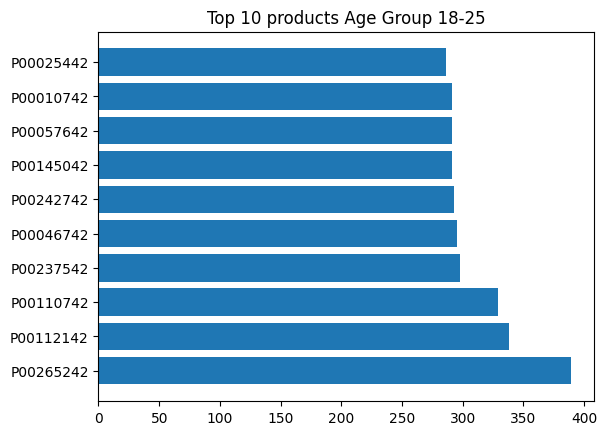

In [ ]:
for i in df['Age'].unique():
  temp = df[df['Age'] == i]
  temp = temp['Product_ID'].value_counts()[:10]

  plt.barh(y = temp.index, width = temp.values)

  if i == '0-17':
    plt.title('Top 10 products Age Group 0-17')
  if i == '55+':
    plt.title('Top 10 products Age Group 55+')
  if i == '26-35':
    plt.title('Top 10 products Age Group 26-35')
  if i == '46-50':
    plt.title('Top 10 products Age Group 46-50')
  if i == '51-55':
    plt.title('Top 10 products Age Group 51-55')
  if i == '36-45':
    plt.title('Top 10 products Age Group 36-45')
  if i == '18-25':
    plt.title('Top 10 products Age Group 18-25')
  plt.show()

**Insight:**
  

*   **P00265242 is highest selling product** amoung the Age groups 18-25, 26-35, 46-50, 51-55 and 55+



## **3.3.2 Relationship between age, marital status, and the amount spent**

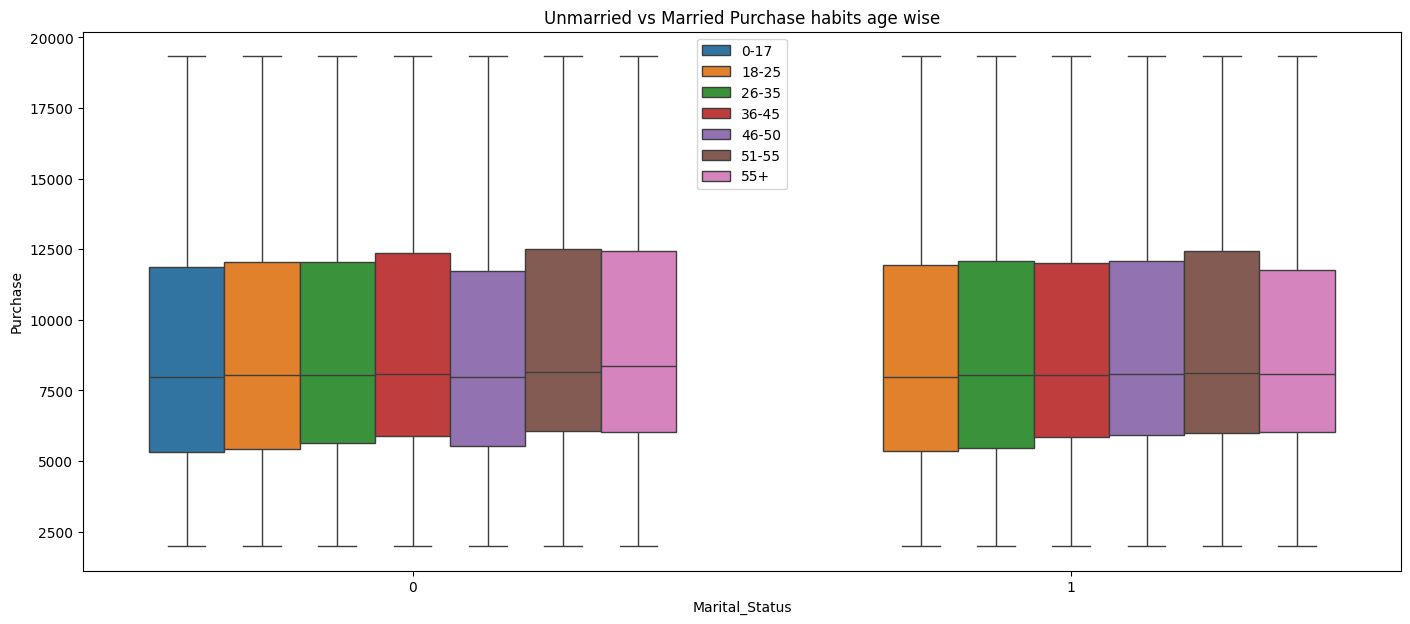

In [ ]:
plt.figure(figsize = (17,7))
sns.boxplot(data=df, y='Purchase', x='Marital_Status', hue='Age')
plt.legend(loc=9)
plt.title('Unmarried vs Married Purchase habits age wise')

plt.show()

**Insights:**


*   Unmarried: The median values for Age 0-17 and 46-50 are slightly lower.
*   The median values for Married customers across all age groups are almost the same



## **3.3.3 Preferred product categories for different genders**

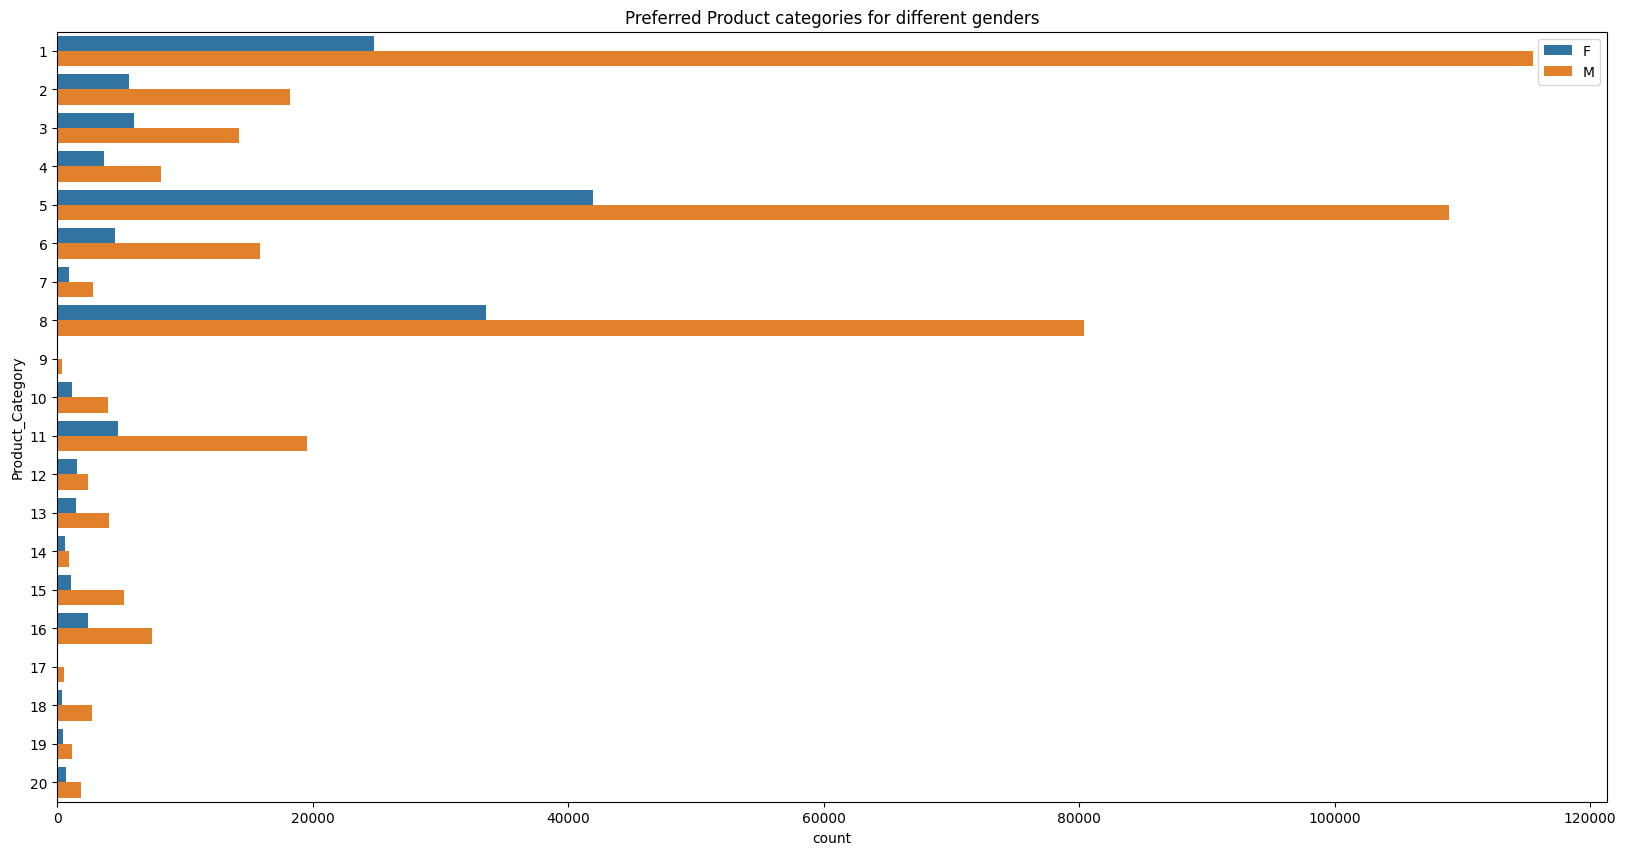

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, y='Product_Category', hue='Gender')
plt.legend()
plt.title('Preferred Product categories for different genders')

plt.show()

**Insights:**


*   For Male: Preferred product categories for Male are 1, 5 and 8
*   For Female: Preferred product categories for Female are 5, 8 and 1

# **4. Constructing 95% Confidence Intervals**

## **4.1 Gender**

### **4.1.1 CI for whole dataset**

In [ ]:
m_df = df[df['Gender'] == "M"]['Purchase']
f_df = df[df['Gender'] == "F"]['Purchase']

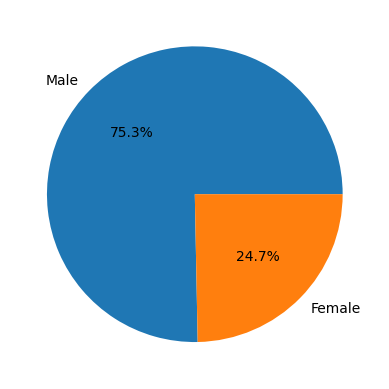

In [ ]:
gender = df['Gender'].value_counts()
plt.pie(gender.values, labels = ['Male', 'Female'], autopct = '%.1f%%')

plt.show()

In [ ]:
#CI for whole dataset

lower_value = np.percentile(m_df, 2.5)
upper_value = np.percentile(m_df, 97.5)

print("CI for Male:", [lower_value, upper_value], "Range:", upper_value - lower_value)

lower_value_f = np.percentile(f_df, 2.5)
upper_value_f = np.percentile(f_df, 97.5)

print("CI for Female:", [lower_value_f, upper_value_f], "Range:", upper_value_f - lower_value_f)

CI for Male: [1984.0, 19336.0] Range: 17352.0
CI for Female: [1984.0, 19336.0] Range: 17352.0


### **4.1.2 CI for smaller sample sizes - 300, 3000, and 30000**

In [ ]:
# Defining Function for calculating & plotting Confidence Interval

def plotting_ci(col, sample):
  for i in range(len(col.unique())):
    temp_df = df[col == col.unique()[i]]['Purchase']
    b = []
    for j in range(1000):
      a = np.random.choice(temp_df,size = sample).mean()
      b.append(a)

    # Plotting CLT curve
    sns.kdeplot(b, fill = True)
    plt.title(f'CLT Curve for Sample Size = {sample}')

    # Calculating Confidence Intervals
    mean = temp_df.mean()
    sd = temp_df.std()
    confidence = 95
    se = sd / np.sqrt(sample)
    z = (100 - confidence)/200
    z1 = norm.ppf(z)
    z2 = norm.ppf(1 - z)
    confidence_interval = [round(mean + (se * z1)), round(mean + (se * z2))]

    print("For", col.unique()[i], "Sample size :", sample, "CI:", confidence_interval, "Range:", round(confidence_interval[1]-confidence_interval[0]))

  return plt.show()

For F Sample size : 300 CI: [8216, 9257] Range: 1041
For M Sample size : 300 CI: [8870, 9985] Range: 1115


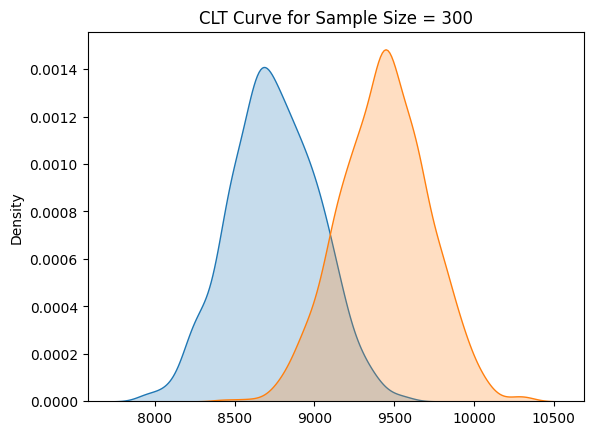

For F Sample size : 3000 CI: [8572, 8901] Range: 329
For M Sample size : 3000 CI: [9251, 9604] Range: 353


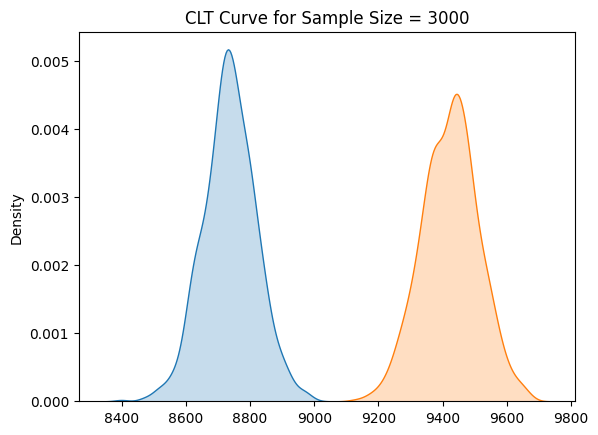

For F Sample size : 30000 CI: [8685, 8789] Range: 104
For M Sample size : 30000 CI: [9371, 9483] Range: 112


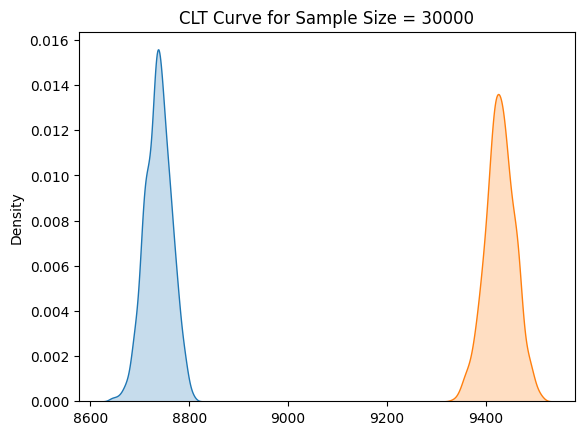

In [ ]:
sample_sizes = [300, 3000, 30000]
for i in sample_sizes:
  plotting_ci(df['Gender'], i)

**Insights:**


1.   **Total Transactions Comparison**

  *   75% of the total transactions are done by male while the females amount to only 25%.

2.  **Sample Size**
  * The analysis showcase different sample sizes in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise thus providing more reliable estimates.

3. **Confidence Intervals**
  * At sample size 30 the CLT curve for men and women overlap a little but as we increase the sample size the curve do not overlap. This means there is a significant difference between the average spending per transaction for men and women.

4. **Conclusion**
  * We can be 95% Confident that on an average a male customer spends in the range of `$9371, to $9483` and a female customer spends in the range of `$8685 to $8789` per transaction.
  * We can conclude that men tend to spend more per transcation than women.






**Recommendations**

1. In order to promote sales amoung female customers Walmart can create targeted marketing campaigns, loyalty programs and introduce products popular amoung the the female customer base.

2. To increase the average spending amooung the male customers Walmart can look into discount strategy and incentivise high spending.  

## **4.2 Marital Status**

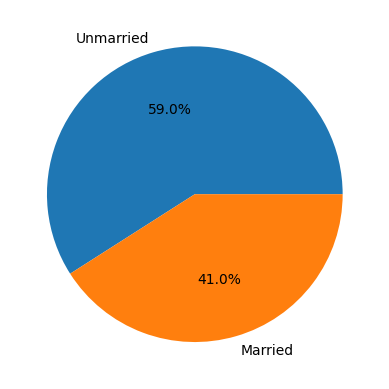

In [ ]:
M_Status = df['Marital_Status'].value_counts()
plt.pie(M_Status.values, labels = ['Unmarried', 'Married'], autopct = '%.1f%%')

plt.show()

For 0 Sample size : 300 CI: [8708, 9809] Range: 1101
For 1 Sample size : 300 CI: [8706, 9802] Range: 1096


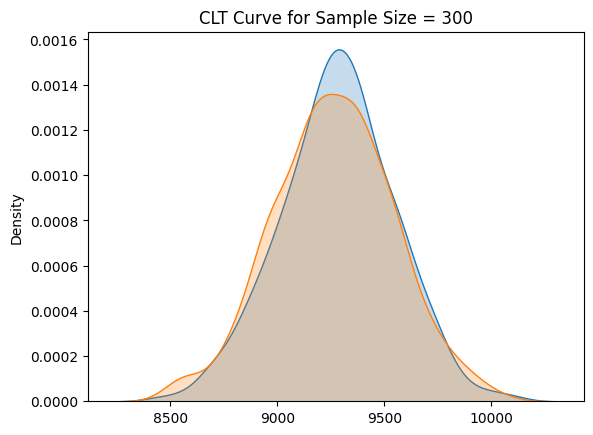

For 0 Sample size : 3000 CI: [9085, 9433] Range: 348
For 1 Sample size : 3000 CI: [9080, 9427] Range: 347


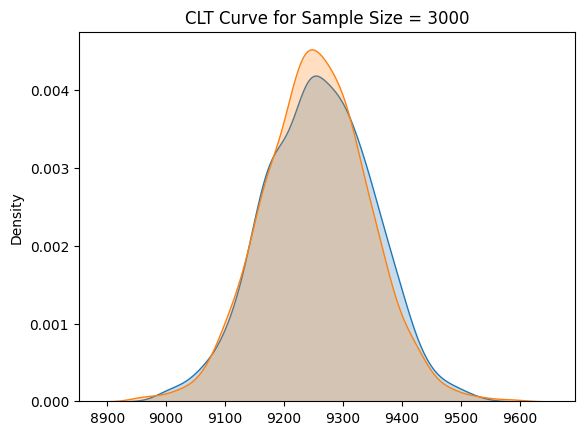

For 0 Sample size : 30000 CI: [9204, 9314] Range: 110
For 1 Sample size : 30000 CI: [9199, 9308] Range: 109


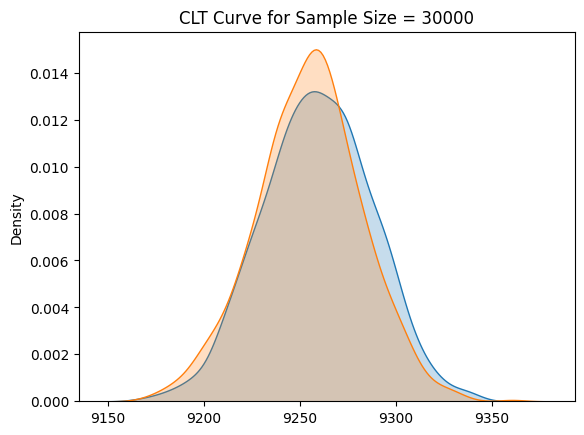

In [ ]:
sample_sizes = [300, 3000, 30000]

for i in sample_sizes:
  plotting_ci(df['Marital_Status'], i)

**Insights:**


1.   **Total Transactions Comparison**

  *   59% of the total transactions are done by Unmarried custtomers while the married customers amount to 41%.

2.  **Sample Size**
  * The analysis showcase different sample sizes in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise thus providing more reliable estimates.

3. **Confidence Intervals**
  * We can see that the confidence interval overlap for all the sample sizes. This means that there is **no significant difference** between the average spending per transaction for married and unmarried customers.

4. **Conclusion**
  * We can be 95% Confident that on an average a Unmarried customer spends in the range of `$9204 to $9314` and a married customer spends in the range of `$9199 to $9308` per transaction.
  * We can conclude that both the groups have **similar spending behavior**.

**Recommendations**

1. Walmart can focus on broader marketing strategy that caters to both married and unmarried customers.  

## **4.3 Age groups**

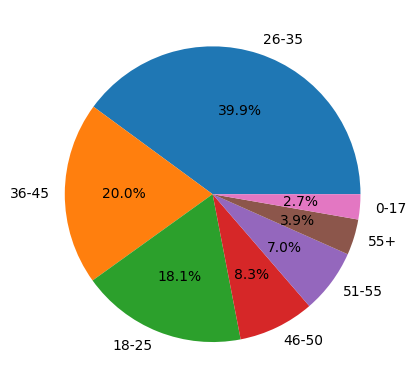

In [ ]:
Age_group = df['Age'].value_counts()
plt.pie(Age_group.values, labels = Age_group.index, autopct = '%.1f%%')

plt.show()

For 0-17 Sample size : 300 CI: [8382, 9500] Range: 1118
For 55+ Sample size : 300 CI: [8787, 9869] Range: 1082
For 26-35 Sample size : 300 CI: [8694, 9793] Range: 1099
For 46-50 Sample size : 300 CI: [8663, 9746] Range: 1083
For 51-55 Sample size : 300 CI: [8963, 10066] Range: 1103
For 36-45 Sample size : 300 CI: [8774, 9871] Range: 1097
For 18-25 Sample size : 300 CI: [8616, 9722] Range: 1106


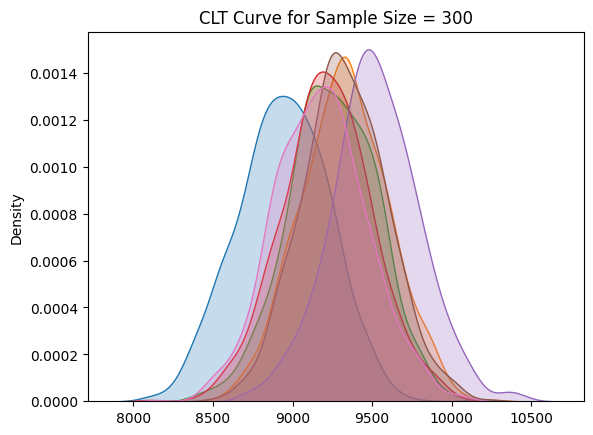

For 0-17 Sample size : 3000 CI: [8764, 9117] Range: 353
For 55+ Sample size : 3000 CI: [9157, 9499] Range: 342
For 26-35 Sample size : 3000 CI: [9070, 9418] Range: 348
For 46-50 Sample size : 3000 CI: [9033, 9375] Range: 342
For 51-55 Sample size : 3000 CI: [9340, 9689] Range: 349
For 36-45 Sample size : 3000 CI: [9149, 9496] Range: 347
For 18-25 Sample size : 3000 CI: [8994, 9344] Range: 350


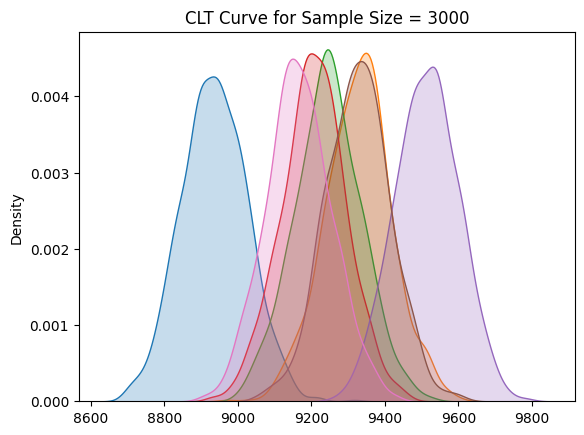

For 0-17 Sample size : 30000 CI: [8885, 8997] Range: 112
For 55+ Sample size : 30000 CI: [9274, 9382] Range: 108
For 26-35 Sample size : 30000 CI: [9189, 9299] Range: 110
For 46-50 Sample size : 30000 CI: [9150, 9258] Range: 108
For 51-55 Sample size : 30000 CI: [9460, 9570] Range: 110
For 36-45 Sample size : 30000 CI: [9268, 9378] Range: 110
For 18-25 Sample size : 30000 CI: [9114, 9224] Range: 110


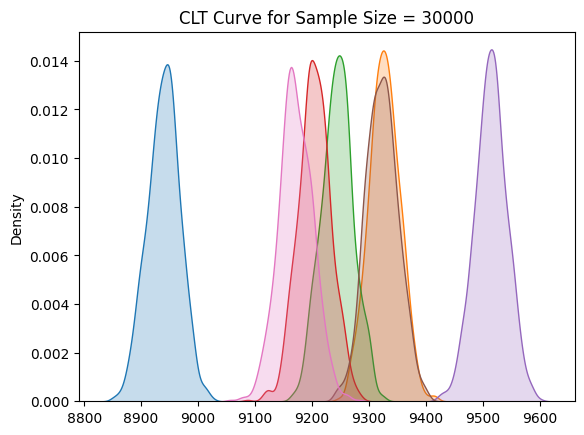

In [ ]:
sample_sizes = [300, 3000, 30000]

for i in sample_sizes:
  plotting_ci(df['Age'], i)

**Insights:**


1.   **Total Transactions Comparison**

  *   75% of the total transactions are done by male while the females amount to only 25%.

2.  **Sample Size**
  * The analysis showcase different sample sizes in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise thus providing more reliable estimates.

3. **Confidence Intervals**
  * From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -
    * **0 - 17** - Customers in this age group have the lowest spending per transaction
    * **18 - 25, 26 - 35, 46 - 50** - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
    * **36 - 45, 55+** - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
    * **51 - 55** - Customers in this age group have the highest spending per transaction

4. **Conclusion**
  * We can be 95% Confident that on an average amount spends per transaction for Age group -
    * **0 - 17**  - Between `$8885 to $8997`
    * **18 - 25** - Between `$9114 to $9224`
    * **26 - 35** - Between `$9189 to $9299`
    * **36 - 45** - Between `$9268 to $9378`
    * **46 - 50** - Between `$9150 to $9258`
    * **51 - 55** - Between `$9460 to $9570`
    * **55+**     - Between `$9274 to $9382`

**Recommendations**

1. Since 0-17 age group has the lowest spending per transaction and contributes to only 2.7% of total number of transactions, Walmart can introduce discount coupons and loyalty programs to promote sales.   

2. Age group 0-17 have the lower purchasing power which results to less sales. Walmart can initiate credit based payment method to increase to number of sales. **Buy Now - Pay Later** feature will result in impulse buying amoung the customers.

3. Age group of 51 - 55 have the highest spendinng per transaction, Walmart can **optimize the website** and show/recommend high ticket products to customers who belong to the age group 51-55.